# More Visualization Types

In [ ]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# read and process the charts dataset
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
# transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

In [ ]:
# read and process the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
tracks_df.head()

In [ ]:
# merge the charts and tracks dataset
streams_df = charts_df.merge(tracks_df, on='track_id', how='left')
streams_df = streams_df.drop(columns='track_name_y')
streams_df = streams_df.rename(columns={'track_name_x': 'track_name'})
streams_df.head()

In [ ]:
# transform date column into a datetime column
streams_df['date'] = pd.to_datetime(streams_df['date'])
streams_df = streams_df.set_index('date')
streams_df.head()

### 1. Histograms

Put simply, histograms are graphical representation of tallies.
Read more about histograms here: (https://statistics.laerd.com/statistical-guides/understanding-histograms.php).

These are very useful in EDA because at a glance, you could already see how the data is spread over its range.

In particular, you should look out for:
1. *Skewness and Kurtosis* - Do the values peak around the mean, or over lower (left-skewed)/higher values(right-skewed)? Is the tail light or heavy?
2. *Mode* - Does it have one peak (unimodal)? two peaks (bimodal)? How many peaks does it contain?
3. *Outliers* - Are there a few data points that are substantially distant from bulk of all values?

It is <u>strongly advised</u> that you look at histograms before you do any data aggregations.


**Q**: Compare the positions earned by Ariana Grande, Dua Lipa and Lady Gaga Songs in 2019

In [ ]:
plt.hist?

In [ ]:
np.arange(0, 210, 10)

In [ ]:
data = streams_df[streams_df['artist'] == 'Ariana Grande']['2019-01-01':'2019-12-31']
plt.hist(data['position'].values, bins=np.arange(0, 210, 10),
             histtype='stepfilled', label='Ariana Grande', alpha=0.35)

plt.ylabel('Frequency')
plt.xlabel('Position')

plt.xticks([1]+np.arange(0, 210, 10).tolist())
plt.xlim([200, 1])

In [ ]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

for artist_name in ["Ariana Grande", "Dua Lipa", "Lady Gaga"]:
    data = streams_df[(streams_df['artist'] == artist_name)]['2019-01-01':'2019-12-31']
    plt.hist(data['position'].values, bins=np.arange(0, 210, 10),
             histtype='stepfilled', label=artist_name, alpha=0.35)

plt.xticks([1]+np.arange(0, 210, 10).tolist())
plt.xlim([200, 1])

plt.ylabel('Frequency')
plt.xlabel('Position')
plt.legend(frameon=False)

### 2. Stacked Bar/Area chart

A stacked bar/area chart shows the extent of contribution of one/few parts to the whole.
It is advised that the total is divided to 2-3 major contributing parts only--lump all else in another category ("others")

**Q**: How many streams did the songs from Ed Sheeran's 2 latest albums *No 6 collaboration project* (`album id: 3oIFxDIo2fwuk4lwCmFZCx`) and *Divide* (`album id: 3T4tUhGYeRNVUGevb0wThu`) contribute to his monthly total streams in 2019?

In [ ]:
df_ed = streams_df[streams_df['artist'] == 'Ed Sheeran'].loc['2019-01-01':'2019-12-31']\
    .groupby(['album_id'])['streams']\
    .resample('M').sum().reset_index()\
    .sort_values('streams', ascending=False)
#df_ed = df_ed.set_index('date')
df_ed['album_name'] = df_ed['album_id'].apply(lambda x:
                                              'No.6' if (x == '3oIFxDIo2fwuk4lwCmFZCx') else
                                              'Divide' if (x == '3T4tUhGYeRNVUGevb0wThu') else 'others')

df_ed = df_ed.set_index('date')
df_ed

In [ ]:
df_ed = streams_df[streams_df['artist'] == 'Ed Sheeran'].loc['2019-01-01':'2019-12-31']\
    .groupby(['album_id'])['streams']\
    .resample('M').sum().reset_index()\
    .sort_values('streams', ascending=False)
#df_ed = df_ed.set_index('date')
df_ed['album_name'] = df_ed['album_id'].apply(lambda x:
                                              'No.6' if (x == '3oIFxDIo2fwuk4lwCmFZCx') else
                                              'Divide' if (x == '3T4tUhGYeRNVUGevb0wThu') else 'others')

df_ed = df_ed.set_index('date')
df_ed = df_ed.groupby(['album_name'])['streams']\
    .resample('M').sum().reset_index()\
    .sort_values('streams', ascending=False)
df_ed

In [ ]:
data.plot.area?

In [ ]:
df_ed.pivot(index='date',columns='album_name',values='streams')#/1000000

In [ ]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

color_list = ['skyblue', 'C7', '0.8']
# reshape
data = df_ed.pivot(index='date', columns='album_name',
                   values='streams')  # /1000000
data.plot.area(ax=ax, lw=0, color=color_list)

#plt.yticks(np.arange(0,25,5),[str(x)+'M' if x>0 else str(x) for x in np.arange(0,25,5)])
plt.ylabel('streams')

plt.xlabel('')
plt.legend(frameon=False)

In [ ]:
# reshape
data = df_ed.pivot(index='date', columns='album_name', values='streams')
# normalize with monthly sums
data[data.columns] = 100*data[data.columns].div(data.sum(axis=1), axis=0)
data

In [ ]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

color_list = ['skyblue', 'C7', '0.8']
# reshape
data = df_ed.pivot(index='date', columns='album_name', values='streams')
# normalize with monthly sums
data[data.columns] = 100*data[data.columns].div(data.sum(axis=1), axis=0)
# plot
data.plot.area(ax=ax, lw=0, color=color_list)

# custom ticks
#plt.yticks(np.arange(0, 120, 20), [str(x)+'%' for x in np.arange(0, 120, 20)])
plt.ylabel('streams')
plt.ylim([0, 100])

plt.xlabel('')
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(
    0.5, -0.05), frameon=False, ncol=3)

>Q: Extend the stacked area plots above to cover up to December 2020

### 3. Boxplot

Box plots are useful as they provide a visual summary of the data to quickly identify mean values, the dispersion of the data set, and signs of skewness. 

Here are the parts of a box plot
![](https://www.simplypsychology.org/boxplot.jpg?ezimgfmt=rs:279x143/rscb18/ng:webp/ngcb18)

**Q**: How does loudness, tempo, danceability, energy, and valence of KPOP girl group songs compare with the rest of the dataset?

In [ ]:
kpop_girl_grps = ["BLACKPINK", "Girls' Generation-Oh!GG", "Girls' Generation-TTS",
                  "ITZY", "IZ*ONE", "MOMOLAND", "Red Velvet", "TWICE"]
features = ["danceability", "energy", "valence", "tempo", "loudness"]

columns_to_view = ['artist_name', 'track_name'] + features

In [ ]:
df_features = tracks_df[columns_to_view].copy()

df_features['is_gg'] = ['kpop girl group' if artist in kpop_girl_grps else 'all else'
                       for artist in df_features['artist_name'].values]

# get max value for normalization
max_tempo = df_features['tempo'].max()
max_loudness = df_features['loudness'].min()

# normalize tempo and loudness
df_features['tempo']= df_features['tempo']/max_tempo
df_features['loudness']= df_features['loudness']/max_loudness

# set multiindex
df_features = df_features.set_index(['track_name', 'artist_name', 'is_gg'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked = pd.DataFrame({'value': df_features.stack()})
# # reset index
df_features_stacked = df_features_stacked.reset_index()
# # rename level_3
df_features_stacked = df_features_stacked.rename(columns={'level_3': 'feature'})
df_features_stacked.head()

In [ ]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y='value',  hue='is_gg', ax=ax,
            hue_order=['kpop girl group', 'all else'], palette=['pink', 'C7'])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

### 4. Heatmap
The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph. The goal of the heatmap is to provide a colored visual summary of information.

**Q**: Visualize Ben&Ben songs in top 200 as a heatmap of its monthly streams

In [49]:
df_bb = streams_df[streams_df['artist'] == "Ben&Ben"].groupby('track_name')[['streams']]\
    .resample('M').sum()
df_bb = df_bb.reset_index()
df_bb = df_bb[df_bb['date'] < '2021-01-31']
# clean long titles
df_bb['track_name'] = df_bb['track_name'].apply(lambda x: x.split('(')[0])\
    .apply(lambda x: x.split(' - ')[0])
df_bb

,track_name,date,streams
0,Araw-Araw,2019-05-31,98063
1,Araw-Araw,2019-06-30,0
2,Araw-Araw,2019-07-31,0
3,Araw-Araw,2019-08-31,0
4,Araw-Araw,2019-09-30,742222
...,...,...,...
514,Susi,2018-09-30,586438
515,Susi,2018-10-31,1471573
516,Susi,2018-11-30,446932
517,Susi,2018-12-31,21139


In [51]:
arr_df = df_bb.pivot(index='track_name', columns='date', values='streams')
# divide by 1M to show streams in millions
arr_df = arr_df/1000000
arr_df.fillna(0, inplace=True)
arr_df['total_streams'] = arr_df.sum(axis=1)
#arr_df = arr_df.sort_values('total_streams',ascending=False)
arr_df

date,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00,...,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00,total_streams
track_name,,,,,,,,,,,,,,,,,,,,,
Kathang Isip,0.280954,0.863016,1.458789,3.038092,2.971419,3.555698,4.006722,4.536738,4.926569,4.621256,...,2.484648,2.469632,2.530607,2.540565,2.592954,2.550331,2.669107,2.487798,2.618704,126.735698
Maybe The Night,0.000000,0.116554,0.774609,1.053442,0.899834,0.872002,1.007785,1.097370,1.256929,1.949700,...,2.228005,2.200540,2.232245,2.423969,2.416452,2.409646,2.549195,2.338397,2.441213,107.137826
Pagtingin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.396421,2.261182,2.367641,2.266993,2.224862,2.091080,1.676319,1.735933,2.000890,78.103013
Leaves,0.000000,0.087427,0.712558,0.994337,0.797855,0.745658,0.781892,0.898596,1.089112,1.154267,...,1.762051,1.702367,1.614909,1.691660,1.863257,1.804952,1.971873,1.918460,1.920565,50.124894
Make It With You,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.858902,2.975663,2.448683,2.206913,2.264185,2.241801,2.420474,2.186986,2.488580,46.439131
Masyado Pang Maaga,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.110854,1.339370,1.413162,1.260048,1.160002,1.048984,0.978769,0.958256,0.996466,33.855640
Araw-Araw,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.996053,1.683163,1.683582,1.529244,1.471411,1.413817,1.368266,1.455109,1.564007,30.488366
Sa Susunod na Habang Buhay,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.553371,2.956551,3.260658,2.846813,2.689044,2.478591,1.927027,1.431650,1.841971,29.113863
Lifetime,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.645274,2.763850,2.455631,1.491684,1.492117,1.417438,1.421983,14.687977


Text(0.5, 33.0, '')

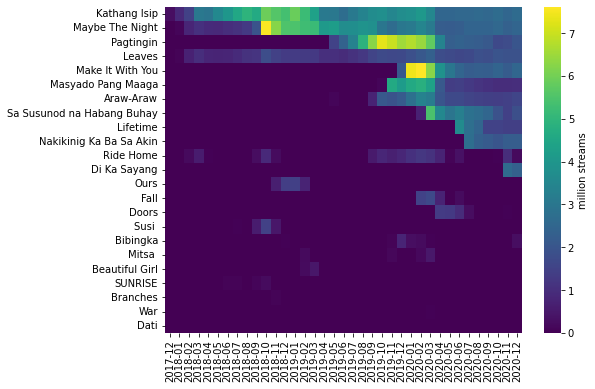

In [53]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

# get all month columns and specify format for xticks
moncols = arr_df.columns[:-1]
yymm_cols = pd.Series(moncols.values).apply(lambda x: x.strftime('%Y-%m'))

sns.heatmap(arr_df[moncols], ax=ax,
            cmap='viridis',
            cbar_kws={'label': 'million streams', 'ticks': np.arange(0, 8, 1)},
            xticklabels=yymm_cols, yticklabels=True)

plt.ylabel('')
plt.xlabel('')

**Q**: Visualize Jose Mari Chan songs as a heatmap of its monthly streams

In [54]:
df_jmc = streams_df[streams_df['artist']=="Jose Mari Chan"].groupby('track_name')[['streams']]\
                                                                .resample('M').sum()
df_jmc = df_jmc.reset_index()
df_jmc = df_jmc[df_jmc['date']<'2021-01-31']
#clean long titles
df_jmc['track_name'] = df_jmc['track_name'].apply(lambda x: x.split('(')[0])\
                                        .apply(lambda x: x.split(' - ')[0])
df_jmc

,track_name,date,streams
1,A Christmas Song for You,2017-12-31,22993
2,A Christmas Song for You,2018-01-31,0
3,A Christmas Song for You,2018-02-28,0
4,A Christmas Song for You,2018-03-31,0
5,A Christmas Song for You,2018-04-30,0
...,...,...,...
175,Mary's Boy Child,2020-11-30,0
176,Mary's Boy Child,2020-12-31,43527
189,Pagdating Ng Pasko,2020-09-30,29593
190,The Bells At Christmas,2020-09-30,34661


In [55]:
arr_df = df_jmc.pivot(index='track_name', columns='date',values='streams')
#divide by 100k to show streams in hundred thousands
arr_df = arr_df/100000
arr_df.fillna(0, inplace=True)
arr_df['total_streams'] = arr_df.sum(axis=1)
arr_df = arr_df.sort_values('total_streams',ascending=False)

Text(0.5, 33.0, '')

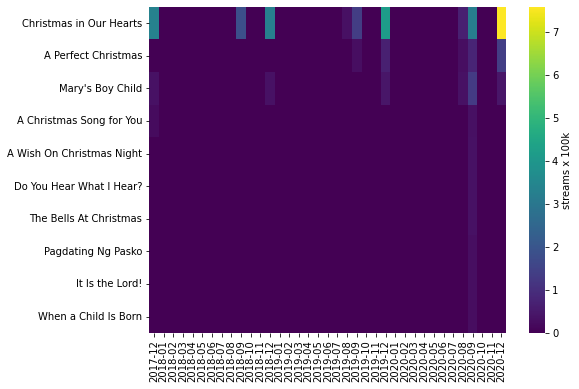

In [56]:
plt.figure(figsize=(8,6))    
ax = plt.subplot(111) 

#get all month columns and specify format for yticks
moncols=arr_df.columns[:-1]
yymm_cols = pd.Series(moncols.values).apply(lambda x: x.strftime('%Y-%m'))

sns.heatmap(arr_df[moncols],ax=ax,
            cmap='viridis',
            cbar_kws={'label': 'streams x 100k' },
            xticklabels=yymm_cols, yticklabels=True)

plt.ylabel('')
plt.xlabel('')